In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.datasets import make_blobs

In [3]:
!pip install kneed

In [7]:
features, true_labels = make_blobs(n_samples = 200,
                                  centers = 3,
                                  cluster_std=2.75,
                                  random_state = 42
                                  )

In [8]:
#the features in our data 
features[0:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [9]:
#labels assigned to the features
true_labels[0:5]

array([1, 0, 2, 2, 2])

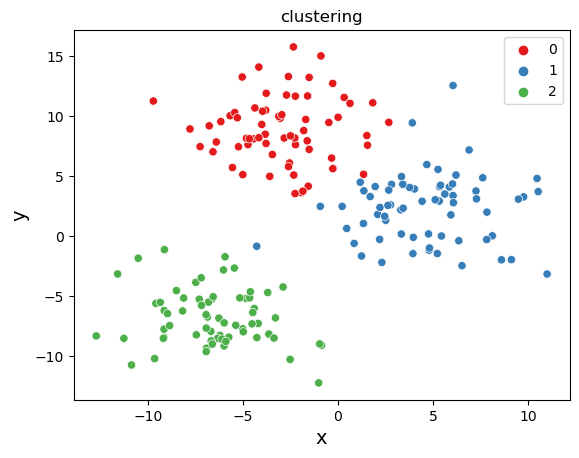

In [14]:
#visualizing the data 
sns.scatterplot(x=[x[0] for x in features],
               y=[x[1] for x in features],
               hue = true_labels,
               palette = 'Set1', 
               label=None)
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.title('clustering')
plt.show;

In [15]:
#standardize the features 
scaled_features = StandardScaler().fit_transform(features)

In [17]:
#preview of our scaled values
scaled_features[0:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [21]:
#instantiate the kmeans 
kmeans = KMeans(n_clusters = 3,
               init = 'random',
               n_init = 10,
               random_state = 42,
               max_iter = 300)

In [22]:
#fitt the scaled data
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [23]:
#checking the statistics in our kmeans
kmeans.inertia_

74.57960106819851

In [26]:
#centroids of the groups
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [28]:
#number of iterations for convergence
kmeans.n_iter_

2

In [29]:
#assigned labels
kmeans.labels_[0:5]

array([2, 0, 1, 1, 1], dtype=int32)

### selecting appropriate number of clusters

In [38]:
#create arguments to pass to the means
kmeans_args = {
    'init' :'random',
    'n_init' : 10,
    'random_state' : 42,
    'max_iter' : 300
         }

In [39]:
#
sse= []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, **kmeans_args)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

In [41]:
#preview the sse
enumerate(sse)

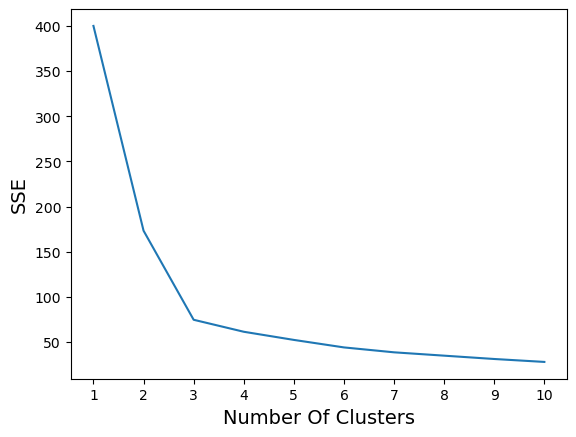

In [44]:
plt.plot(range(1, 11),sse)
plt.xticks(range(1, 11))
plt.xlabel('Number Of Clusters', fontsize=14)
plt.ylabel('SSE', fontsize= 14)
plt.show()

In [45]:
knee = KneeLocator(
    range(1,11), sse, curve = 'convex', direction = 'decreasing'
)

In [46]:
knee.elbow

3

In [48]:
#using the silhouette coeff = measure of cluster cohesion and separation

sl_coef = []

for k in range(2,11):
    kmeans= KMeans(n_clusters=k, **kmeans_args)
    kmeans.fit(scaled_features)
    sl_score = silhouette_score(scaled_features, kmeans.labels_)
    sl_coef.append(sl_score)

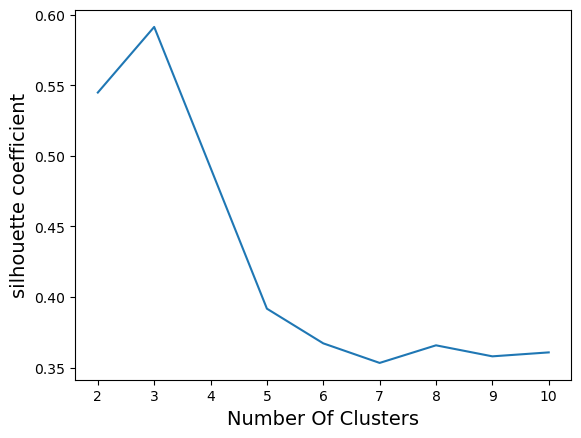

In [50]:
plt.plot(range(2, 11),sl_coef)
plt.xticks(range(2, 11))
plt.xlabel('Number Of Clusters', fontsize=14)
plt.ylabel('silhouette coefficient', fontsize= 14)
plt.show()

the best choice for k is the maximum score

### evaluation for clustering perfomance

### pipeline

### implementing during classes